# Pràctica 4: SVM


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta práctica será molt més dirigida que l'anterior. S'evaluarán els següents conceptes sobre una mateixa base de dades, que tractarà sobre els vins:

* A. SVM (20%)
* B. ROC curve vs PR (30%)
* C. Crossvalidation (30%)
* D. Hyperparameter search (20%)


### Dataset
Per aquesta pràctica hem decidit treballar amb una base de dades de imatges. Es tracta de [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). És similar a la base de dades de MNIST, un dataset clàssic en la visió per computador. Són imatges de 28x28 pixels i en escala de grisos. El original disposa de 60.000 imatges de entrenament i 10.000 de test. Està anotat en 10 categories diferents:

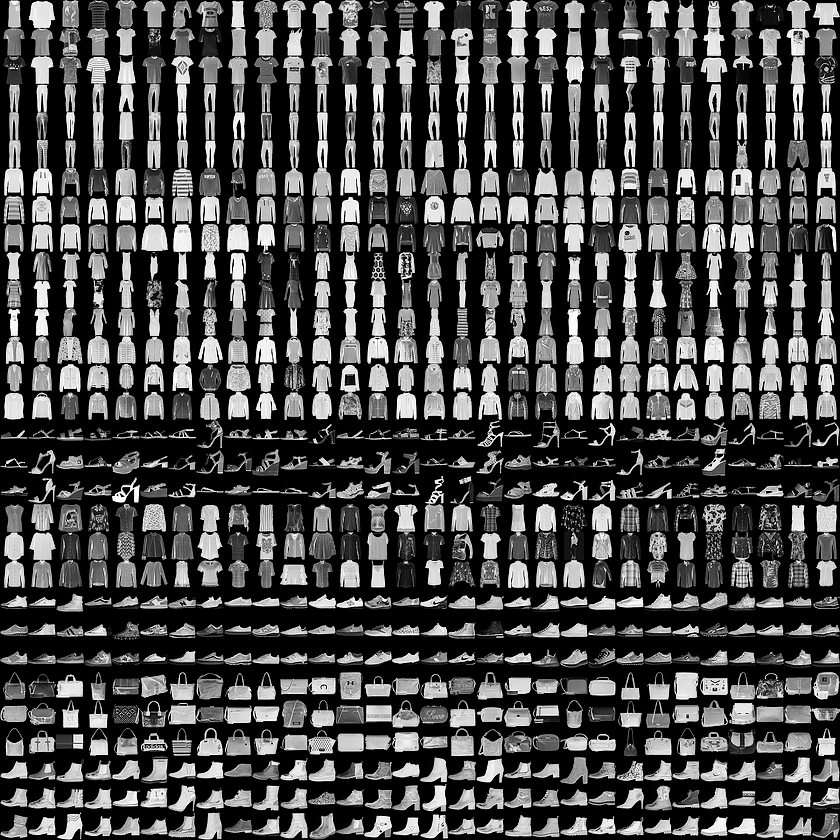

|Id|Nom|
|:-:|:--|
|0|T-shirt/top 
|1|Trouser |
|2|Pullover| 
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag |
|9|Ankle boot|


Ens hem descarregat el csv desde: https://www.kaggle.com/zalando-research/fashionmnist.

Els hem simplificat i dividit en altres csv més petits. Tenim els originals, i llavors un subsampling (100 vegades més petit). Dels petits, a més, també tenim el cas binari.

| nom | set | # exemples | # categories |
|:--|:-:|:-:|:-:|
|fashion-mnist_train_small_binary.csv   |train|     600 |  2 |
|fashion-mnist_test_small_binary.csv    |test |     100 |  2 |
|fashion-mnist_train_small.csv          |train|     600 | 10 |
|fashion-mnist_test_small.csv           |test |     100 | 10 |
|fashion-mnist_train.csv                |train|  60.000 | 10 |
|fashion-mnist_test.csv                 |test |  10.000 | 10 |

Les dues originals, les podeu *descarregar* del link de [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv). Son uns 150MB una vegada descomprimits.


In [3]:
# Importar llibreries i obrir el dataset

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('fashion-mnist_train_small_binary.csv')
Y_train = dataset["label"]
X_train = dataset.drop("label", axis="columns")


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (600, 785)


## A. SVM (20%)

L'objectiu d'aquest apartat es familiaritzar-se amb el modul de [SVM de sklearn](https://scikit-learn.org/stable/modules/svm.html).

En aquest apartat només farem servir les dades **fashion-mnist_train_small_binary.csv**	i **fashion-mnist_train_small.csv**



Bàsicament tenim a dos models: el [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) i el [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

#### SVC

El model SVC está implementat a través de libsm. El temps d'entrenament escala almenys **quadràticament** amb el número de exemples.

A més, el multiclass s'implementa amb la estratègia One-Vs-One (OVO).

Tot i així, ens permet fer servir varis **kernels**: 
* ‘linear’
* ‘poly’ 
* ‘rbf’ (default)
* ‘sigmoid’ 
* ‘precomputed’ 

Mireu quins parametres apliquen a cada un dels kernels a la seva [documentació](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

*EL FAREM SERVIR QUAN TENIM **POCS EXEMPLES**, O MOLT DE TEMPS..*

#### LinearSVC

El model SVC está implementat a través de liblinear. Hauria de permetre treballar amb més dades (escala molt millor amb el número d'exemples).

A més, el multiclass s'implementa amb la estratègia One-Vs-Rest (OVR)

*EL FAREM SERVIR QUAN TENIM **MOLTS EXEMPLES** i el temps de SVC es intractable*




Recordeu el que significa One-Vs-One (OVO) i One-Vs-Rest (OVR)

<img src="https://machinelearningwithmlr.files.wordpress.com/2019/10/ch06_fig_8_mlr.png?w=584">


Exemple de SVC:

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, Y_train)
y_train_pred = clf.predict(X_train)
y_train_scr = clf.decision_function(X_train)

accuracy_train = accuracy_score(Y_train, y_train_pred)

print("The accuracy on training is {}".format(accuracy_train))

The accuracy on training is 0.975


### Preguntes

#### binary classification
1. Entrena un model SVC **binary** (nomès dues categories) amb les dades **fashion-mnist_train_small_binary.csv**. Comprova el error de predicció sobre el conjunt d'entrenament. 
2. Quin model has fet servir per defecte? Amb quina C? Podries millorar el error de entrenament fàcilment (imagina que nomès tens 2 intents). Què modificaries)?
3. Explica què son els atributs clf.support_vectors_ i el clf.n_support_
4. Entrena un model LinearSVC sobre les mateixes dades. Quin accuracy de train obtens? És més ràpid? 
5. Saps on han anat els atributs clf.support_vectors_ i el clf.n_support_ en el cas del LinearSVC? Tenen alguna relació amb el clf.coef_ i clf.intercept_? [Pista](https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html)

#### multiclass classification
6. Entrena un model SVC multicategoria amb les dades **fashion-mnist_train_small.csv**
7. Entrena un model LinearSVC multicategoria. Quin accuracy de train obtens?



## 1.-  Entrena un model SVC binary (nomès dues categories) amb les dades fashion-mnist_train_small_binary.csv. Comprova el error de predicció sobre el conjunt d'entrenament. 

In [12]:
%time
clf1 = make_pipeline(StandardScaler(), SVC())
print(f"Num of labels is {len(set(Y_train))}")
clf1.fit(X_train, Y_train)
y_train_pred = clf.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_train_pred)
print("The accuracy on training is {}".format(accuracy_train))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
Num of labels is 2
The accuracy on training is 0.975


## 2.-Quin model has fet servir per defecte? Amb quina C? Podries millorar el error de entrenament fàcilment (imagina que nomès tens 2 intents). Què modificaries)?

In [15]:
model_info = clf1.__dict__['steps'][1][1].__dict__
df = pd.DataFrame({k: model_info[k] if not hasattr(model_info[k], '__iter__') else [model_info[k]] for k in model_info})
df

,decision_function_shape,break_ties,kernel,degree,gamma,coef0,tol,C,nu,epsilon,shrinking,probability,cache_size,class_weight,verbose,max_iter,random_state,_sparse,class_weight_,classes_,_gamma,support_,support_vectors_,_n_support,dual_coef_,intercept_,probA_,probB_,fit_status_,shape_fit_,_intercept_,_dual_coef_
0,ovr,False,rbf,3,scale,0.000,0.001,1.000,0.000,0.000,True,False,200,None,False,-1,None,False,"[1.0, 1.0]","[0, 1]",0.001,"[13, 24, 41, 44, 80, 102, 105, 110, 122, 140, ...","[[-0.04085889232227184, -0.05457602347049301, ...","[44, 108]","[[-1.0, -1.0, -1.0, -0.7102201142373296, -1.0,...",[0.9505578752312761],[],[],0,"(600, 784)",[-0.9505578752312761],"[[1.0, 1.0, 1.0, 0.7102201142373296, 1.0, 0.99..."


Explicat: La estrategia que segueix es 1 vs the rest ( però com la resta es 1 ens es indiferent); degut a que nomes tenim dues classes break ties no es fa servir(augmenta el cost computacional en cas de fer-se servir.). Es fa servir un kernel rbf de la forma: $K(x,z) = e^{-\lVert x-z \rVert/2\sigma}$ (rbf) . El atribut grau només ens servirà en cas de fer servir kernel polinomial (no es el cas). El atribut de gamma es fa servir en el kernel rbf i ens indica com de curvat volem el decision boundary ( menys gamma indica menys curvatura). C es el parametre de regularització que per defecte està a 1(a més grans més permisius som amb l'error que genera el decision boundary).Max_iter esta ficat a -1 perque no es pararà fins la convergencia.

La resta d'atributs defineixen matemàticament el model; son els coeficients, intercept, vectors de suport i nombre dels mateixos.

Si nomes tinc dos intents gastaria un en canviar el kernel i un altre en canviar la C(de manera subtil per veure quina es la tendencia).

## 3.-Explica què son els atributs clf.support_vectors_ i el clf.n_support_

In [16]:
df3 = df[['support_vectors_','_n_support']]
print(f"El nombre de support vectosrs es {len(df3['support_vectors_'][0])}; comprobant la llargada del nombre de vectors, i fent servir el atribut n_support la quantitat es {sum(df3['_n_support'][0])}")

El nombre de support vectosrs es 152; comprobant la llargada del nombre de vectors, i fent servir el atribut n_support la quantitat es 152


El atribut support_vectors conté esl vectors de soport que generen el hiperplà per separar les dades. Mentre que el atribut n_support realment conté el nombre de support vectors per a cada clase.

## 4.- Entrena un model LinearSVC sobre les mateixes dades. Quin accuracy de train obtens? És més ràpid? 

In [17]:
%time 
from sklearn.svm import LinearSVC
clf2 = make_pipeline(StandardScaler(), LinearSVC())
clf2.fit(X_train, Y_train)
y_train_pred = clf.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_train_pred)
print("The accuracy on training is {}".format(accuracy_train))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.53 µs
The accuracy on training is 0.975


S'aconsegueix el mateix resultat amb menys temps.

## 5.- Saps on han anat els atributs clf.support_vectors_ i el clf.n_support_ en el cas del LinearSVC? Tenen alguna relació amb el clf.coef_ i clf.intercept_? Pista

Degut a que LinearSVC està implementat en termes de liblinear, per tant la solució que opté es la solució d'un sitema lineal en el que no son necessaris els support vectors ni el nombre dels mateixos. Amb el que ens trobem es amb una serie de coeficients que ens permeten formular una funció de decisió juntament amb l'intercept. 
D'aquestes decisions que fa els coeficients amb l'intercepts es pot arribar a deuïr quin es l'hiperplà de separació de les dades tal i com es fa a l'expmple de pista.

## 6.- Entrena un model SVC multicategoria amb les dades fashion-mnist_train_small.csv

In [18]:
dataset = load_dataset('fashion-mnist_train_small.csv')
Y_train2 = dataset["label"]
X_train2 = dataset.drop("label", axis="columns")


print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (600, 785)


In [19]:
clf3 = make_pipeline(StandardScaler(), SVC())
print(f"Num of labels is {len(set(Y_train2))}")
clf3.fit(X_train2, Y_train2)
svm = clf3.__dict__['steps'][1][1]
print(f"Default decision is {svm.decision_function_shape}")
y_train_pred = clf3.predict(X_train2)
accuracy_train = accuracy_score(Y_train2, y_train_pred)
print("The accuracy on training is {}".format(accuracy_train))

Num of labels is 10
Default decision is ovr
The accuracy on training is 0.8966666666666666


## 7.-Entrena un model LinearSVC multicategoria. Quin accuracy de train obtens?

In [20]:
clf4 = make_pipeline(StandardScaler(), LinearSVC())
print(f"Num of labels is {len(set(Y_train2))}")
clf4.fit(X_train2, Y_train2)
y_train_pred = clf4.predict(X_train2)
accuracy_train = accuracy_score(Y_train2, y_train_pred)
print("The accuracy on training is {}".format(accuracy_train))

Num of labels is 10
The accuracy on training is 1.0


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### B. ROC curve vs PR  (30%)

Un cop apresos els models de svm, com afecten els seus parametres i els kernels, veurem com evaluar-ho correctament.

Per fer això, farem ús de la matriu de confusió per veure si estem classificant correctament [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


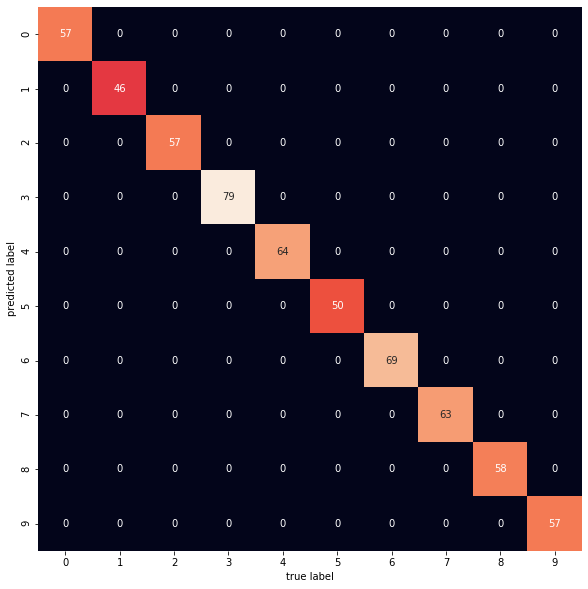

In [21]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_train2, y_train_pred)
fig = plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

A través de la matriu de confusió es pot calcular fàcilment el accuracy, el f1-score, la precisió, el recall... Totes aquestes són mètriques que el calculen com de bé o malament ho fa un classificador tenint en compte **un llindar especific** (i.e. 0.5), o en el cas multiclasse també pot ser la classe més probable. Ara bé, si volguessim visualtizar com de bé ho fa cada classificador per **qualsevol valor del llindar**, podem veure el seu comportament a través de analitzar la [curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) i la [curva Precision-Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html). Per a utilitzar-lo, necesiteu extreure un score de confiança o unes probabilitats de classificació per a cada una de les categories. Ho podem trobar utilitzant la funció:

* clf.decision_function(X) [per SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) i [per LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.decision_function)

Recordem com es calcula la curva ROC i la Precision-Recall. Per cada valor del llindar, tindrem una matriu de confusió diferent. La ROC mostra el **TPR** vs **FPR** i la PR mostra la relació entre **Precision** vs **Recall**.

True Positive Rate (TPR): del total d'exemples positius, quants hem classificat com a positiu.

$$TPR = Recall = Sensitivity = \frac{TP}{TP + FN}$$

False Positive Rate (FPR): del total d'exemples negatius, quantes falses alarmes positives apareixen.

$$FPR = 1 - Specificity = \frac{FP}{FP + TN}$$

Precision: Quina proporcio de prediccions positives es correcta.

$$Precision = \frac{TP}{TP + FP}$$

<img src="https://miro.medium.com/max/1340/1*urQ3A6h1BNgGM__Uvkwviw.png" width=600>

Si voleu refrescar o aprendre més coses sobre aquestes curves, us recomano aquest [blog](https://towardsdatascience.com/on-roc-and-precision-recall-curves-c23e9b63820c)

Exemple:

### Preguntes
1. Mostra les matrius de confusió del apartat A. En tindrem 4: (SVC-binary, LinearSVC-binary, SVC-multiclass, LinearSVC-multiclass) 
2. Compara la curva ROC pels casos binaris de SVC i LinearSVC sobre la mateixa gràfica.
3. Compara la curva PR pels casos binaris de SVC i LinearSVC sobre la mateixa gràfica.
4. Compara les curves ROC del SVC multicategoria en una mateixa gràfica.



## 1.- Mostra les matrius de confusió del apartat A. En tindrem 4: (SVC-binary, LinearSVC-binary, SVC-multiclass, LinearSVC-multiclass) 

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


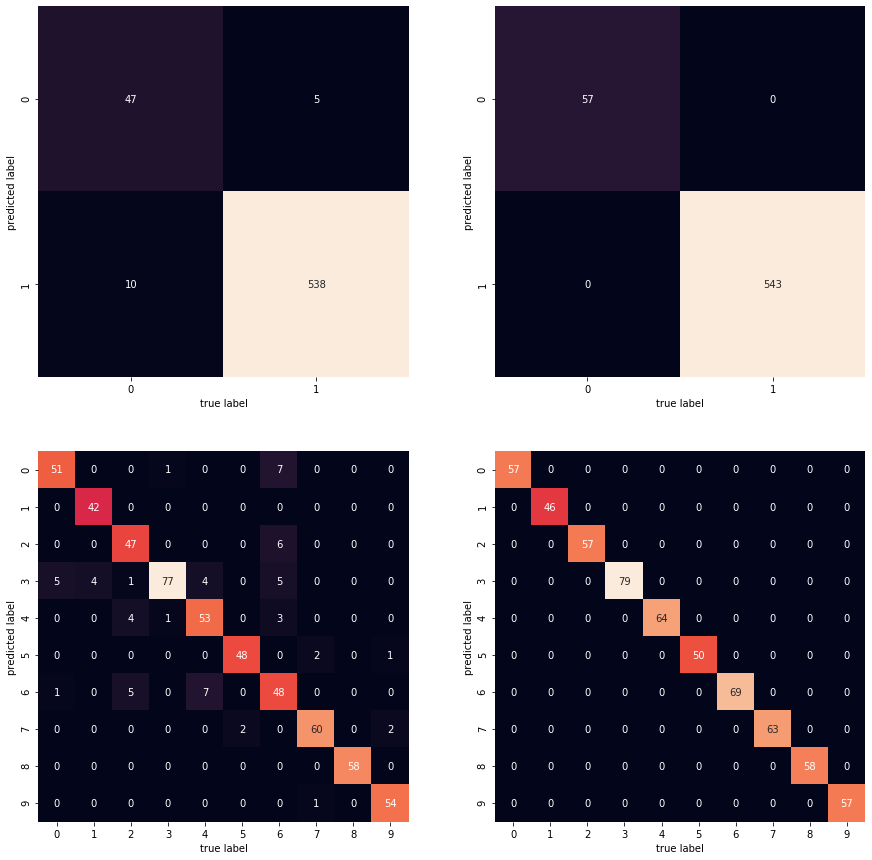

In [22]:

fig,ax = plt.subplots(2,2,figsize=(15,15))
indexes = [[0,0],[0,1],[1,0],[1,1]]
data = [(X_train,Y_train),(X_train,Y_train),(X_train2,Y_train2),(X_train2,Y_train2)]
index= 0 
for clf,(ind0,ind1) in zip( [clf1,clf2,clf3,clf4],indexes):
    clf.fit(data[index][0],data[index][1])
    y_train_pred = clf.predict(data[index][0])
    mat = confusion_matrix(data[index][1], y_train_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,ax=ax[ind0][ind1])
    ax[ind0][ind1].set_xlabel('true label')
    ax[ind0][ind1].set_ylabel('predicted label');
    index+=1

## 2.- Compara la curva ROC pels casos binaris de SVC i LinearSVC sobre la mateixa gràfica.

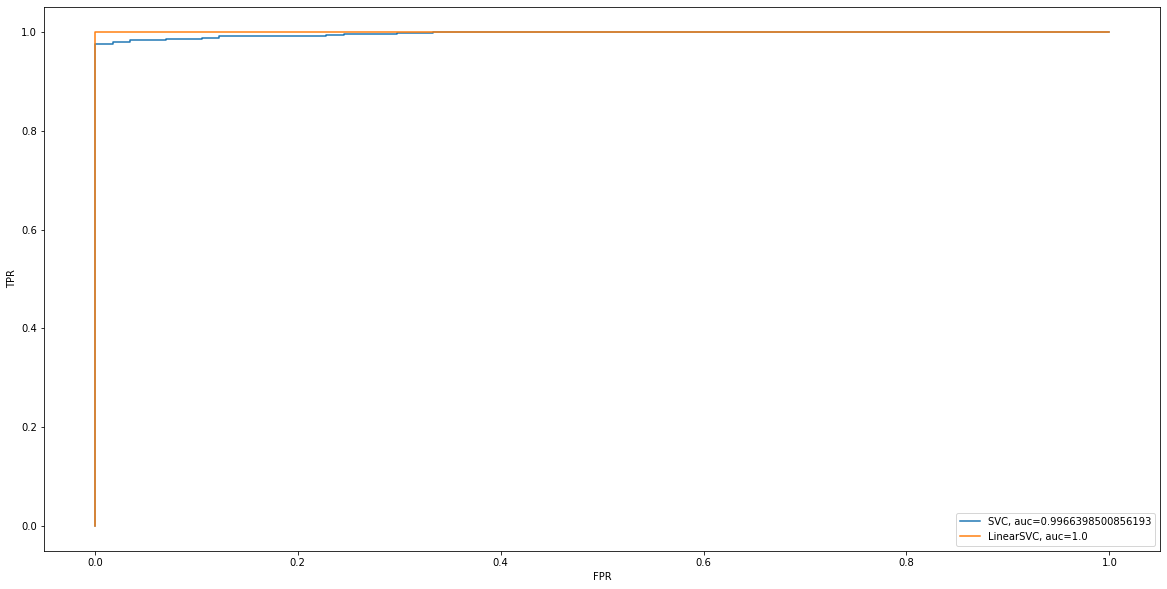

In [72]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0,figsize=(20,10))

y_pred = clf1.decision_function(X_train)
fpr, tpr, thresh = metrics.roc_curve(Y_train, y_pred)
auc = metrics.roc_auc_score(Y_train, y_pred)
plt.plot(fpr,tpr,label="SVC, auc="+str(auc))

y_pred2 = clf2.decision_function(X_train)
fpr, tpr, thresh = metrics.roc_curve(Y_train, y_pred2)
fpr, tpr, thresh = metrics.roc_curve(Y_train, y_pred2)
auc = metrics.roc_auc_score(Y_train, y_pred2)
plt.plot(fpr,tpr,label="LinearSVC, auc="+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()


## 3.- Compara la curva PR pels casos binaris de SVC i LinearSVC sobre la mateixa gràfica.

(600,)


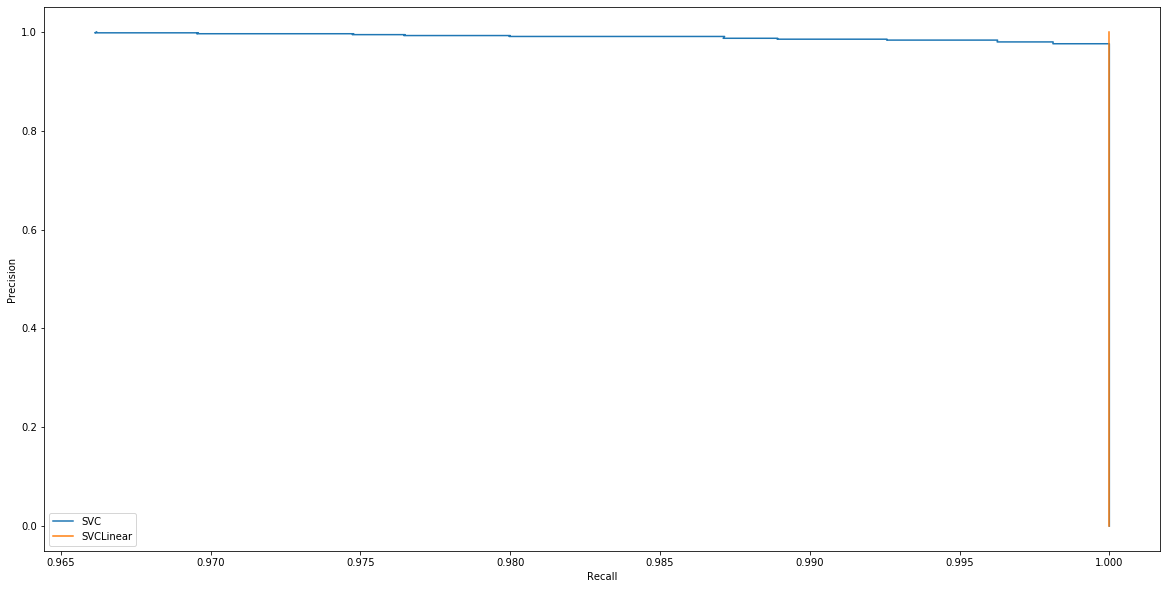

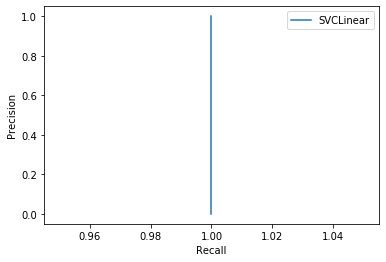

In [84]:
from sklearn.metrics import precision_recall_curve
plt.figure(0,figsize=(20,10))
print(y_pred.shape)
precision, recall, thresholds = precision_recall_curve( Y_train, y_pred)
precision2, recall2, thresholds = precision_recall_curve( Y_train, y_pred2)

plt.plot(precision,recall,label="SVC")
#plt.figure()
plt.plot(precision2,recall2,label="SVCLinear")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.figure()
plt.plot(precision2,recall2,label='SVCLinear')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

Podem verue que per al model lineal ens trobem amb un recall igual a 1 ( cosa que implica que mai dona false negatives)

## 4.- Compara les curves ROC del SVC multicategoria en una mateixa gràfica.

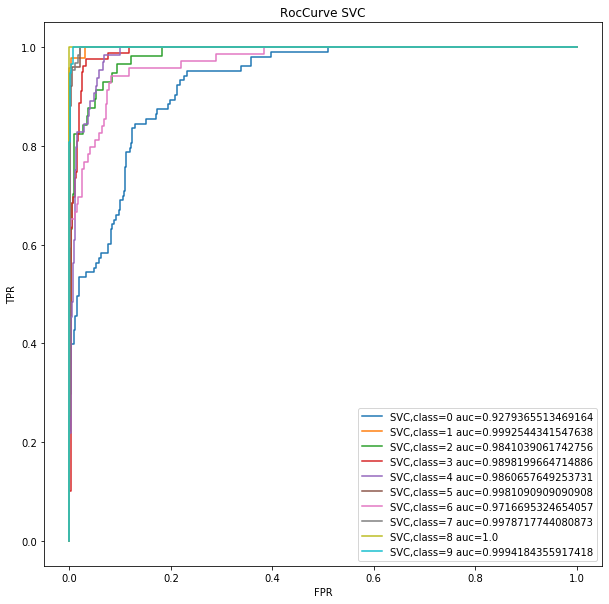

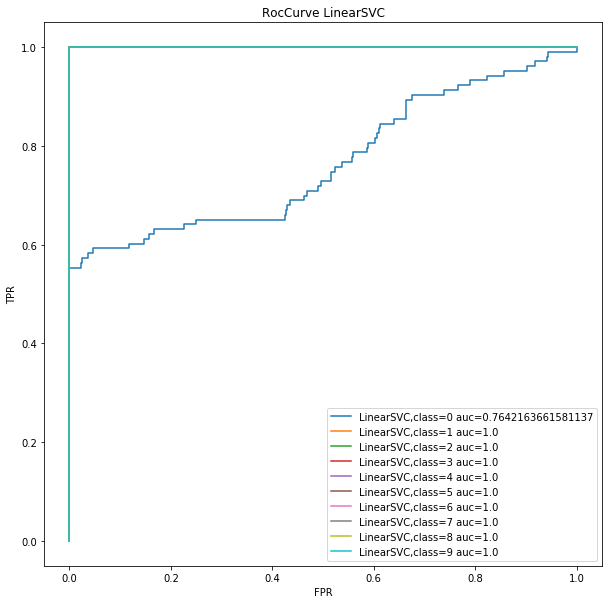

In [29]:
fig = plt.figure(0,figsize=(10,10))
plt.title(f"RocCurve SVC")
for i in (set(Y_train2)):
    
   
    
    y_pred = clf3.decision_function(X_train2)
    temp1 = Y_train2.copy()
    if i!=1:
        temp1[temp1==1] = 0
        
    temp1[temp1 == i] = 1
    temp1[temp1!=1] = 0
    temp  = y_pred[:,i]
    fpr, tpr, thresh = metrics.roc_curve(temp1, temp)
    auc = metrics.roc_auc_score(temp1, temp)
    plt.plot(fpr,tpr,label=f"SVC,class={i} auc="+str(auc))

    
    plt.xlabel("FPR")
    plt.ylabel("TPR")

plt.legend()
plt.figure(figsize=(10,10))
plt.title(f"RocCurve LinearSVC")
for i in (set(Y_train2)):
    
    y_pred = clf4.decision_function(X_train2)
    temp1 = Y_train2.copy()
    if i!=1:
        temp1[temp1==1] = 0
        
    temp1[temp1 == i] = 1
    temp1[temp1!=1] = 0
    temp  = y_pred[:,i]
 
    fpr, tpr, thresh = metrics.roc_curve(temp1, temp)
    auc = metrics.roc_auc_score(temp1, temp)
    plt.plot(fpr,tpr,label=f"LinearSVC,class={i} auc="+str(auc))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
plt.legend()

Podem veure com el model SVC té problemes amb varies classes mentres que el moder linearSVC te una performance perfecta ent totes les classes excepte en una; que dona problemes significatius. Es planteja la hipótesi de si fer un model que identifiqui a les 0 amb total certesa i aquest per classificar a les altres seria una bona combinació.

## C. Crossvalidation (30%)

Com debeu haver comprobat, els resultats fins ara son molt alts. I es per què estem analizant el resultat sobre el mateix conjunt de aprenentatge i aquests valors no ens serveixen de gaire quan volguem aplicar el model a dades noves.

Per aquest motiu, el que intentarem de fer en aquest apartat és gestionar les dades que tenim de entrenament per a que poguem llavors trobar els millors hiperparametres que ens permetin aconseguir la millor taxa d'encert en dades mai vistes abans (per aquest motiu, no volem veure com és el test, ja que no volem fer trampes i optimitzar el nostre model sobre la sortida).

Ens basarem amb les eines de [cross-validació](https://scikit-learn.org/stable/modules/cross_validation.html).

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500px">

Ara bé, tingueu també en compte, que tan important com utilitzar dades mai vistes per optimitzar el classificador, també s'ha de fer el mateix en l'apartat del preprocessat (com per exemple al normalitzar o estandaritzar les dades). No es poden aprendre les transformacions amb dades de "test".

El cas més senzill (menys linies de codi) es fer servir la funció [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) i [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

Ara bé, també vull que entengueu què s'hi fa dins, aixi que farem els dos casos

Exemple:

In [85]:

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
%time
scoring = ['precision_macro', 'recall_macro']
clf = SVC(kernel='linear', C=1e-2, random_state=0)
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=5, return_train_score=True)
print(scores['test_precision_macro'])


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
[0.87087087 0.87087087 0.9499583  0.80288462 0.90740741]


### Preguntes
1. Utilitza la funció **cross_validate** i **make_pipepline** per trobar quin **accuracy** té el model **SVC()** amb les dades normalitzades amb **StandardScaler**. [(pista)](https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation)
2. Analitza el diccionari de camps que t'ha retornat.
3. Implementa la funció per cross-validar un model i uns parametres en concret. Utilitza la següent funció **entrena_crossvalida** com a base.
4. Compara els resultats de la pregunta C.3 amb el de la pregunta C.1.


## 1.- Utilitza la funció cross_validate i make_pipepline per trobar quin accuracy té el model SVC() amb les dades normalitzades amb StandardScaler. (pista)

In [86]:
own_clf = make_pipeline(StandardScaler() ,SVC(C=1e2,kernel='linear')) 
info = (cross_validate(own_clf,X_train,Y_train,cv=5))


## 2.- Analitza el diccionari de camps que t'ha retornat.

In [41]:
pd.DataFrame(info)

,fit_time,score_time,test_score
0,0.032,0.006,0.967
1,0.028,0.006,0.958
2,0.032,0.006,0.975
3,0.025,0.005,0.925
4,0.032,0.007,0.950


Es pot apreciar que torna 3 paràmetres: fit_time,score_time i test_score.

**Fit_time** :  Es el temps que tardà el model en generar el hiperpla que millor separà les dades en l'espai que el kernel li indica.

**Score_time**: Es el temps que tarda en fer el predict i mesurar la accuracy sobre el mateix

**Test_score**: Es la puntuació que ha obtingut aquesta separació de les dades sobre la separació de validació.

## 3.- Implementa la funció per cross-validar un model i uns parametres en concret. Utilitza la següent funció entrena_crossvalida com a base.

In [61]:
from sklearn.model_selection import KFold
import time
from sklearn.metrics import f1_score
from tqdm.notebook import tqdm



def entrena_crossvalida(model, X, y, k_folds): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X: caracteristiques entrenament
       - y: etiqueta entrenament
       - k_folds: número de folds d'entrenament
    '''
    
    results = {"accuracy_mean_train":[],"accuracy_std_train":[],"train_accuracy": [], "train_f1_score": [], "val_accuracy": [], "val_f1_score": [],"elapsed": []}

    """
    Inicialitza el FOLD objecte (i.e. KFold) amb k_folds. Cal fer shuffle a les dades?
    """
    kf = KFold(n_splits=k_folds,shuffle=True)
    
    """
    Itera les dades per cada fold:
    """
    for i, (train_index, val_index) in tqdm(enumerate(kf.split(X))):
        t_i = time.time()
        print("CROSSVALIDANT FOLD {}".format(i))
        X_train, X_val = X.loc[train_index, :], X.loc[val_index, :]
        y_train, y_val = y[train_index], y[val_index]

        
        """
        Entrena el model amb X_train i y_train:
        """
        model.fit(X_train,y_train)
        
        """
        Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
        """
        pred_train = model.score(X_train,y_train)
        pred_val = model.score(X_val,y_val)
        score_train = model.decision_function(X_train)
        score_val = model.decision_function(X_val)
        """
        Calcular el accuracy i el F1-score del train i del test
        """
        results["train_accuracy"].append(pred_train)
        results["train_f1_score"].append(f1_score(y_train,model.predict(X_train)))
        results["val_accuracy"].append(pred_val)
        results["val_f1_score"].append(f1_score(y_val,model.predict(X_val)))
        results["elapsed"].append(time.time() - t_i)

    results["accuracy_mean_train"] = np.mean(results["train_accuracy"])
    results["accuracy_std_train"] = np.std(results["train_accuracy"])
    results["accuracy_mean_val"] = np.mean(results["val_accuracy"])
    results["accuracy_std_val"] = np.std(results["val_accuracy"])
    
    print("El model {} ha té un accuracy promig en {} folds de {} +- {}.".format(model.__class__.__name__, 
                                                                                 k_folds,
                                                                                 results["accuracy_mean_val"],
                                                                                 results["accuracy_std_val"]))
    
    
    return results
 

SI tenim varies classes es una bona ide fer shuffle per evitar que hi hagi classes predominants en ningun fold.

In [62]:
from sklearn.svm import SVC

model = SVC()

info = (entrena_crossvalida(model, X_train, Y_train, k_folds=5))

CROSSVALIDANT FOLD 0
CROSSVALIDANT FOLD 1
CROSSVALIDANT FOLD 2
CROSSVALIDANT FOLD 3
CROSSVALIDANT FOLD 4

El model SVC ha té un accuracy promig en 5 folds de 0.9483333333333333 +- 0.009718253158075509.


## 4.- Compara els resultats de la pregunta C.3 amb el de la pregunta C.1.

In [63]:
pd.DataFrame({k:info[k] for k in info if hasattr(info[k],'__iter__')})

,train_accuracy,train_f1_score,val_accuracy,val_f1_score,elapsed
0,0.965,0.980,0.967,0.982,0.144
1,0.971,0.984,0.950,0.973,0.140
2,0.977,0.987,0.942,0.968,0.141
3,0.969,0.983,0.942,0.968,0.140
4,0.969,0.983,0.942,0.968,0.133


A nivell de performance ambdués solcuiones donen respostes molt semblants; tot i així es pot apreciar una principal diferencia ie es en rendiment. En tots els casos es 4 cops mes lent el model fet per nosaltres.

Tot i ser molt semblants en performance es pot apreciar una millora a nivell de variança  en el C.1 hi ha varainces de mes de 0.04; essent la màxima de la nostra implementació 0.012

## D. Hyperparameter search (20%)

Finalment, crossvalidar un model serveix per tenir una idea bastant aproximada del performance que hauriem d'aconseguir amb un model, unes dades i uns hiperparametres concrets sobre unes dades mai vistes abans. Llavors, si tenim unes dades d'entrenament donades, el que hem d'optimitzar és buscar quin model i quins hiperparametres s'ajusten millor a les nostres necesitats (i.e. més precisió, la millor precisió tenint el compte el cost...).

Per fer això, existeix la búsqueda de hiperparametres. En el cas de SVM, per exemple, podriem optimitzar la C (la força de la regularització), el kernel a utilitzar, els parametres propis de cada kernel (degree  pel 'poly', gamma per ‘rbf’, ‘poly’ i ‘sigmoid’...).

Un exemple de búsqueda de hiperparametres es el [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Aqui, es faran les N combinacions segons els parametres i els valors especificats.

Una altra opció és utilitzar una búsqueda Aleatoria del valors, i esperar a trobar la millor solució. D'això se'n diu [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). En aquest cas, pots definir el **n_iter** que vols que provi. Es a dir, si dius que n_iter=10, farà 10 proves amb diferents valors dels hiperparametres.

Exemple:

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
from sklearn.svm import SVC

model = SVC()
dist = np.logspace(-5,5,20)
distributions = dict(C=dist,
                     kernel=['poly', 'rbf'],
                     gamma=dist)
clf = RandomizedSearchCV(model, distributions, random_state=0, n_iter=10)
search = clf.fit(X_train, Y_train)
print("BEST PARAMS: {}".format(search.best_params_))
print("BEST SCORE: {}".format(search.best_score_))

BEST PARAMS: {'kernel': 'poly', 'gamma': 1.8329807108324339, 'C': 20.6913808111479}
BEST SCORE: 0.9433333333333331


### Preguntes
1. Fes una estimació (sense implementar-ho) del número de crosvalidacions que hauries de provar pels diferents parametres i les seves combinacions. Per exemple, considerant només el kernel 'rbf'. Quins hiperparametres poden afectar al resultat final, i quins valors per cada parametre provaries. Conta la seva combinació i multiplicau pel temps que triga a fer una sola crossvalidació.

2. Utilitza **GridSearch** per fer la búsqueda de parametres. Tingues en compte els tipus parametres i les quantitats de valors a provar. Quins hi posaries si no vols que trigui més de 30 minuts.

3. Utilitza **RandomizedSearchCV** per fer búscar els parametres. No permetis que trigui més de 30 minuts. Quins valors ha provat?

4. Quin dels dos mètodes ha donat millor resultat, tenint en compte les restriccions de temps de 30 minuts de cerca.

5. Ara si, evalua el millor model sobre el conjunt de test **'fashion-mnist_test_small.csv'**.

6. Finalment, amb el millor model que hagis aconseguit sobre 'fashion-mnist_train_small.csv', fes un test sobre 'fashion-mnist_test.csv'. Quin resultat obtens? Son similars als de D.5??


## 1.- Fes una estimació (sense implementar-ho) del número de crosvalidacions que hauries de provar pels diferents parametres i les seves combinacions. Per exemple, considerant només el kernel 'rbf'. Quins hiperparametres poden afectar al resultat final, i quins valors per cada parametre provaries. Conta la seva combinació i multiplicau pel temps que triga a fer una sola crossvalidació.

Fixant el kernel podem tocar hiperparàmetres com el regularitzador(C) , el estabilitzador de curvatura(gamma) i com a molt el state random inicial i la tolerancia. 

Fent servir les distribucions logarítmiques per a que el canvi sigui mes significatiu veiem que tenim 20 punts per distribució logarítmica i tenim 2 distribucions(C i gamma). Degut a que l'algoritme es de força bruta s'han de probar totes les combinacions (20*20 = 400) i s'ha de fer cross validation pe cada cas resultant en 2000 execucions del algoritme per trobar els millors hiperparàmetres dinte del domini que se li ha donat.Tot i així podriem donar 3 random states per a que la inicialització de pesos es tingui en compte. Aconseguint així un total de 6000 SVMs. Hauria de fer 5 crossvalidations per cada SVM, per tant 30K crossvalidacions. Tenint en compte que en fer una crossvalidació el temps es de 3e-6 segons hauria de ser instantani. A l'hora de la veritat quan fiques a exevucutar tants fits es produeixen overheads  i es triga mes de 3e-6 segons.

## 2.- Utilitza GridSearch per fer la búsqueda de parametres. Tingues en compte els tipus parametres i les quantitats de valors a provar. Quins hi posaries si no vols que trigui més de 30 minuts.

Degut a que es disposa d'una gran quantitat de cores en el ordinador local desde el que s'executa, s'intentarà aprofitatr al màxim el rendiment del hardware que es fa servir. Es tractarà sobre el problema multiclasse degut a que el de clasificació binaria ja bona molts bons resultats sense computació exhaustiva.

In [66]:
from sklearn.model_selection import GridSearchCV 
import multiprocessing

n_cpu = multiprocessing.cpu_count() 

Primer es fa unes búsquedes ràpides sobre uns paràmetres mab un rang mes gran per saber si ens aproximem.

**Poly** 

In [106]:

parameters = {'kernel':('poly',), 
             'C': [1/x for x in np.logspace(-2,4,6)],
              'gamma':['auto','scale',*[1/x for x in np.logspace(-4,2,6)]],
                'decision_function_shape': ['ovo','ovr'],
              }
svc = SVC()


clf = GridSearchCV(svc, parameters,n_jobs=n_cpu-2,scoring='accuracy', verbose=10)

search = clf.fit(X_train2, Y_train2)
svm = search.best_estimator_
svm.fit(X_train2,Y_train2)
print(svm.score(X_train2,Y_train2))
svm

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.7s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:    0.9s
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:    1.1s
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:    1.2s
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:    1.3s
[Parallel(n_jobs=14)]: Done 100 tasks      | elapsed:    1.5s
[Parallel(n_jobs=14)]: Done 117 tasks      | elapsed:    1.6s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:    1.7s
[Parallel(n_jobs=14)]: Done 153 tasks      | elapsed:    1.9s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    2.0s
[Parallel(n_jobs=14)]: Done 193 tasks      | elapsed:    2.2s
[Parallel(n_jobs=14)]: Done 214 tasks      | elapsed:  

0.9966666666666667


SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Altres kernels**

In [48]:

parameters = {'kernel':( 'linear',), 
                          'C': [1/x for x in np.logspace(-2,4,6)],
              'gamma':['auto','scale',*[1/x for x in np.logspace(-4,2,6)]],
                'decision_function_shape': ['ovo','ovr'],
              }
svc = SVC()

clf = GridSearchCV(svc, parameters,n_jobs=n_cpu-2,scoring='accuracy', verbose=10)

search = clf.fit(X_train2, Y_train2)
svm_l = search.best_estimator_
svm_l.fit(X_train2,Y_train2)
print(svm.score(X_train2,Y_train2))
svm

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.9s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:    1.0s
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:    1.1s
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:    1.2s
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:    1.3s
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:    1.5s
[Parallel(n_jobs=14)]: Done 100 tasks      | elapsed:    1.6s
[Parallel(n_jobs=14)]: Done 117 tasks      | elapsed:    1.7s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:    1.9s
[Parallel(n_jobs=14)]: Done 153 tasks      | elapsed:    2.1s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    2.2s
[Parallel(n_jobs=14)]: Done 193 tasks      | elapsed:    2.4s
[Parallel(n_jobs=14)]: Done 214 tasks      | elapsed:  

1.0


SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
parameters = {'kernel':( 'rbf','sigmoid'), 
              'C': [1/x for x in np.logspace(-2,4,6)],
              'gamma':['auto','scale',*[1/x for x in np.logspace(-4,2,6)]],
                'decision_function_shape': ['ovo','ovr']}
svc = SVC()

clf = GridSearchCV(svc, parameters,n_jobs=n_cpu-2,scoring='accuracy', verbose=10)

search = clf.fit(X_train2, Y_train2)
svm = search.best_estimator_
svm.fit(X_train2,Y_train2)
print(svm.score(X_train2,Y_train2))
svm

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.9s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    1.2s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:    1.3s
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:    1.9s
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:    2.2s
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:    2.5s
[Parallel(n_jobs=14)]: Done 100 tasks      | elapsed:    2.6s
[Parallel(n_jobs=14)]: Done 117 tasks      | elapsed:    3.1s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:    3.5s
[Parallel(n_jobs=14)]: Done 153 tasks      | elapsed:    3.8s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    4.2s
[Parallel(n_jobs=14)]: Done 193 tasks      | elapsed:    4.5s
[Parallel(n_jobs=14)]: Done 214 tasks      | elapsed:  

0.995


SVC(C=6.3095734448019325, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovo', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Fent aquestes probes de paralelisme ens fem una idea de que amb un fitting de 10000 per 14 threads tardem un minut, podriem fer 300000 fits en 30 minuts amb els 4 kernels que no son poly; tenint en compte que el poly va molt més rapid podriem arribar a fer mes de mig milió de fits amb kernel poly; tot i que no tindria gaire gracia.


### Proba dels 30 minuts

In [67]:

parameters = {'kernel':('poly',), 
             'C': [1/x for x in np.logspace(-4,3,50)],
              'gamma':['auto','scale',*[1/x for x in np.logspace(-4,-2,50)]],
                'decision_function_shape': ['ovo','ovr'],
              }
svc = SVC()


clf = GridSearchCV(svc, parameters,n_jobs=n_cpu-2,scoring='accuracy', verbose=10)

search = clf.fit(X_train2, Y_train2)
svm_poly = search.best_estimator_
svm_poly.fit(X_train2,Y_train2)

print(f"Best accuracy for hyperparameters search over training eith kernel polyis {svm_poly.score(X_train2,Y_train2)}")
parameters = {'kernel':( 'rbf','sigmoid'), 
              'C': [1/x for x in np.logspace(-2,4,30)],
              'gamma':['auto','scale',*[1/x for x in np.logspace(-4,2,30)]],
                'decision_function_shape': ['ovo','ovr']}
svc = SVC()

clf = GridSearchCV(svc, parameters,n_jobs=n_cpu-2,scoring='accuracy', verbose=10)

search = clf.fit(X_train2, Y_train2)
svm_kernels = search.best_estimator_
svm_kernels.fit(X_train2,Y_train2)
print(f"Best accuracy for hyperparameters search over training is {svm_kernels.score(X_train2,Y_train2)}")


Fitting 5 folds for each of 5200 candidates, totalling 26000 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.9s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:    1.0s
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:    1.1s
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:    1.2s
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:    1.4s
[Parallel(n_jobs=14)]: Done 100 tasks      | elapsed:    1.5s
[Parallel(n_jobs=14)]: Done 117 tasks      | elapsed:    1.6s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:    1.8s
[Parallel(n_jobs=14)]: Done 153 tasks      | elapsed:    1.9s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    2.0s
[Parallel(n_jobs=14)]: Done 193 tasks      | elapsed:    2.2s
[Parallel(n_jobs=14)]: Done 214 tasks      | elapsed:  

[Parallel(n_jobs=14)]: Done 9494 tasks      | elapsed:  1.2min
[Parallel(n_jobs=14)]: Done 9633 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done 9772 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done 9913 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done 10054 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done 10197 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done 10340 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done 10485 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done 10630 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done 10777 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done 10924 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done 11073 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done 11222 tasks      | elapsed:  1.5min
[Parallel(n_jobs=14)]: Done 11373 tasks      | elapsed:  1.5min
[Parallel(n_jobs=14)]: Done 11524 tasks      | elapsed:  1.5min
[Parallel(n_jobs=14)]: Done 11677 tasks     

Best accuracy for hyperparameters search over training eith kernel polyis 0.9983333333333333
Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.6s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:    1.3s
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:    1.6s
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:    1.9s
[Parallel(n_jobs=14)]: Done 100 tasks      | elapsed:    2.2s
[Parallel(n_jobs=14)]: Done 117 tasks      | elapsed:    2.5s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:    3.0s
[Parallel(n_jobs=14)]: Done 153 tasks      | elapsed:    3.4s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    3.8s
[Parallel(n_jobs=14)]: Done 193 tasks      | elapsed:    4.3s
[Parallel(n_jobs=14)]: Done 214 tasks      | elapsed:  

[Parallel(n_jobs=14)]: Done 9494 tasks      | elapsed:  3.4min
[Parallel(n_jobs=14)]: Done 9633 tasks      | elapsed:  3.4min
[Parallel(n_jobs=14)]: Done 9772 tasks      | elapsed:  3.5min
[Parallel(n_jobs=14)]: Done 9913 tasks      | elapsed:  3.5min
[Parallel(n_jobs=14)]: Done 10054 tasks      | elapsed:  3.6min
[Parallel(n_jobs=14)]: Done 10197 tasks      | elapsed:  3.6min
[Parallel(n_jobs=14)]: Done 10340 tasks      | elapsed:  3.7min
[Parallel(n_jobs=14)]: Done 10485 tasks      | elapsed:  3.7min
[Parallel(n_jobs=14)]: Done 10630 tasks      | elapsed:  3.8min
[Parallel(n_jobs=14)]: Done 10777 tasks      | elapsed:  3.8min
[Parallel(n_jobs=14)]: Done 10924 tasks      | elapsed:  3.9min
[Parallel(n_jobs=14)]: Done 11073 tasks      | elapsed:  3.9min
[Parallel(n_jobs=14)]: Done 11222 tasks      | elapsed:  4.0min
[Parallel(n_jobs=14)]: Done 11373 tasks      | elapsed:  4.0min
[Parallel(n_jobs=14)]: Done 11524 tasks      | elapsed:  4.1min
[Parallel(n_jobs=14)]: Done 11677 tasks     

Best accuracy for hyperparameters search over training is 0.9933333333333333


Hem fet servir  aproximadament 3 cops mes CPUs del normal; així doncs es fa sevir un temps de búsqueda exhausitva de 10 min 

## 3.- Utilitza RandomizedSearchCV per fer búscar els parametres. No permetis que trigui més de 30 minuts. Quins valors ha provat?

In [34]:
model = SVC()


parameters = {'kernel':('poly',), 
             'C': [1/x for x in np.logspace(-2,4,50)],
              'gamma':['auto','scale',*[1/x for x in np.logspace(-4,2,50)]],
                'decision_function_shape': ['ovo','ovr'],
              }
clf3 = RandomizedSearchCV(model, parameters,n_iter=10000,n_jobs=n_cpu-2,verbose=2 )
search = clf3.fit(X_train2, Y_train2)
svm_poly30 = search.best_estimator_
print(svm_poly30)
svm_poly30.fit(X_train2,Y_train2)


print(f"Best accuracy for hyperparameters search over training eith kernel poly is {svm_poly30.score(X_train2,Y_train2)}")
parameters = {'kernel':( 'rbf','sigmoid'), 
              'C': [1/x for x in np.logspace(-2,4,30)],
              'gamma':['auto','scale',*[1/x for x in np.logspace(-4,2,30)]],
                'decision_function_shape': ['ovo','ovr']}
svc = SVC()

clf4 = RandomizedSearchCV(model, parameters,n_iter=10000,n_jobs=n_cpu-2,verbose=2 )

search = clf4.fit(X_train2, Y_train2)
svm_kernels30 = search.best_estimator_
print(svm_kernels30)
svm_kernels30.fit(X_train2,Y_train2)
print(f"Best accuracy for hyperparameters search over training is {svm_kernels30.score(X_train2,Y_train2)}")

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5200 is smaller than n_iter=1000000. Running 5200 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.2s


Fitting 5 folds for each of 5200 candidates, totalling 26000 fits


[Parallel(n_jobs=14)]: Done 240 tasks      | elapsed:    2.0s
[Parallel(n_jobs=14)]: Done 646 tasks      | elapsed:    5.2s
[Parallel(n_jobs=14)]: Done 1212 tasks      | elapsed:    9.6s
[Parallel(n_jobs=14)]: Done 1942 tasks      | elapsed:   15.3s
[Parallel(n_jobs=14)]: Done 2832 tasks      | elapsed:   22.3s
[Parallel(n_jobs=14)]: Done 3886 tasks      | elapsed:   30.6s
[Parallel(n_jobs=14)]: Done 5100 tasks      | elapsed:   40.1s
[Parallel(n_jobs=14)]: Done 6478 tasks      | elapsed:   50.8s
[Parallel(n_jobs=14)]: Done 8016 tasks      | elapsed:  1.1min
[Parallel(n_jobs=14)]: Done 9718 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done 11580 tasks      | elapsed:  1.5min
[Parallel(n_jobs=14)]: Done 13606 tasks      | elapsed:  1.8min
[Parallel(n_jobs=14)]: Done 15792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=14)]: Done 18142 tasks      | elapsed:  2.4min
[Parallel(n_jobs=14)]: Done 20652 tasks      | elapsed:  2.7min
[Parallel(n_jobs=14)]: Done 23326 tasks      | elaps

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best accuracy for hyperparameters search over training eith kernel poly is 0.9966666666666667
Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3840 is smaller than n_iter=10000. Running 3840 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:    3.1s
[Parallel(n_jobs=14)]: Done 337 tasks      | elapsed:    7.3s
[Parallel(n_jobs=14)]: Done 620 tasks      | elapsed:   13.4s
[Parallel(n_jobs=14)]: Done 985 tasks      | elapsed:   21.3s
[Parallel(n_jobs=14)]: Done 1430 tasks      | elapsed:   30.8s
[Parallel(n_jobs=14)]: Done 1957 tasks      | elapsed:   42.1s
[Parallel(n_jobs=14)]: Done 2564 tasks      | elapsed:   55.2s
[Parallel(n_jobs=14)]: Done 3253 tasks      | elapsed:  1.2min
[Parallel(n_jobs=14)]: Done 4022 tasks      | elapsed:  1.4min
[Parallel

SVC(C=5.736152510448679, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovo', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best accuracy for hyperparameters search over training is 0.9933333333333333


Tenint en compte que s'han fet servir més CPU's de les normals; en comptes de ficar-nos un marge de 30 minuts dividirem el temps per 3(degut a que si tinguessim un terç del nombre de CPU's seria més comú.)

## 4.- Quin dels dos mètodes ha donat millor resultat, tenint en compte les restriccions de temps de 30 minuts de cerca.

Tenint en compte que l'espai de cerca era el mateix per ambdós, han trigat el mateix en fer els 45K fits que se'ls hi demanava, 10 minuts. Els dos métodes han trobat exactament els millors hiperparàmetres (El randomSearch ha tardat una mica menys)

## 5.- Ara si, evalua el millor model sobre el conjunt de test 'fashion-mnist_test_small.csv'.



#### 10 min poly GridCV

In [69]:

df = load_dataset("fashion-mnist_test_small.csv")
Y = df['label']
X = df.drop('label',axis='columns')
## 30 min poly GridCV
print(f"My model has  test accuracy of : {svm_poly.score(X,Y)} ")


My model has  test accuracy of : 0.71 


#### 10 min other kernels GridCV

In [42]:

Y = df['label']
X = df.drop('label',axis='columns')
#30 min search GridCV
print(f"My model has  test accuracy of : {svm_kernels.score(X,Y)}")


My model has a mean test accuracy of : 0.82


#### 10 min poly Random

In [43]:

df = load_dataset("fashion-mnist_test_small.csv")
Y = df['label']
X = df.drop('label',axis='columns')
## 30 min poly Random
print(f"My model has  test accuracy of : {svm_poly.score(X,Y)} ")


My model has  test accuracy of : 0.71 


#### 10 min other kernels Random

In [45]:

Y = df['label']
X = df.drop('label',axis='columns')
#30 min kernels
print(f"My model has   test accuracy of : {svm_kernels30.score(X,Y)}")


My model has a mean test accuracy of : 0.82


Podem assegurar que degut a que el GridCV fa una búsqueda exhaustiva i que hem ficat suficients iteracions al random search, ambdós exploren l'espai de búsqueda i trobhen les mateixes solucions.

## 6.- Finalment, amb el millor model que hagis aconseguit sobre 'fashion-mnist_train_small.csv', fes un test sobre 'fashion-mnist_test.csv'. Quin resultat obtens? Son similars als de D.5??


El millor model trobat es el que ha aconseghuit un 82% d'accuracy amb el test es el de búsqueda exhaustiva  sobre els kernesl rbf i sigmoid. De la mateixa manera hi ha un model lineal que ha aconseguit un 100% sobre el training i es volen comparar.

In [51]:
print(f"Linear kernel scoring is: {svm_l.score(X,Y)}")
print(f"RBF kernel scoring is: {svm_kernels.score(X,Y)}")

Linear kernel scoring is: 0.76
RBF kernel scoring is: 0.82


El millor resultat obtigut prové de la busqueda exhausitva sobre el kernel rbf, resultat extret del aparrtat D.5.

## E. Extra (+10% màxim 10 pts a la practica)

El qui ho vulgui, pot realitzar un entrenament amb les dades completes (i.e. fashion-mnist_train.csv) i fer el test sobre fashion-mnist_test.csv.

Tingueu en compte que l'entrenament pot ser **molt costós** (varies hores sense fer crosvalidació amb el SVC). Us recomano de només fer servir **LinearSVC** (Podeu limitar el numero de max_iter..)

### Preguntes
1. Els millors parametres trobats en els apartats anteriors segueixent funcionant aqui?
2. Quin resultat has obtingut al tenir moltes més dades d'entrenament? 
3. Compareu els vostres resultats amb [l'estat de l'art obtinguts amb sklearn o deep learning](https://github.com/zalandoresearch/fashion-mnist#benchmark)





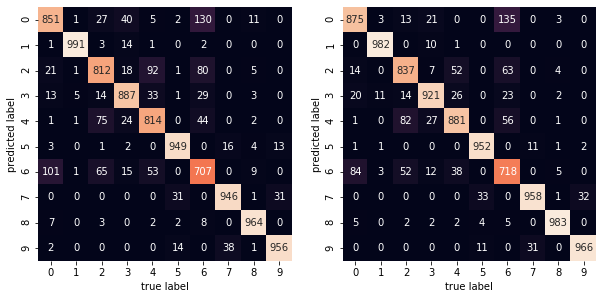

In [62]:
df = load_dataset("./fashion-mnist_train.csv")
Y = df['label']
X = df.drop('label',axis='columns')
df2 = load_dataset("./fashion-mnist_test.csv")
Y2 = df2['label']
X2 = df2.drop('label',axis='columns')
fig,ax = plt.subplots(1,2,figsize=(10,10))
indexes = [0,1]
for clf,ind0 in zip( [svm_poly,svm_kernels],indexes):
    clf.fit(X,Y)
    y_train_pred = clf.predict(X2)
    mat = confusion_matrix(Y2, y_train_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,ax=ax[ind0])
    ax[ind0].set_xlabel('true label')
    ax[ind0].set_ylabel('predicted label');

In [64]:

print(f"Test scoring for hole dataset ( poly kernel) {svm_poly.score(X2,Y2)}")

0.8877


In [65]:

print(f"Test scoring for hole dataset ( poly kernel) {svm_kernels.score(X2,Y2)}")

Test scoring for hole dataset ( poly kernel) 0.9073


## 1.- Els millors parametres trobats en els apartats anteriors segueixent funcionant aqui?

Si, el coneixement extret ha aconseguit generalitzar-se i servir de model funcional sobre un conjunt de dades mai vistes. Tot i que no s'ha agafat els models que donaben un 100% en el training, s'ha agafat aquells en el que la cross validfation es maximitzaba la mitja i es minimitzaba la desviació.

In [52]:
df = load_dataset("./fashion-mnist_train.csv")
Y = df['label']
X = df.drop('label',axis='columns')
svm_poly.fit(X,Y)
df2 = load_dataset("./fashion-mnist_test.csv")
Y = df2['label']
X = df2.drop('label',axis='columns')
svm_poly.score(X,Y)

0.8877

In [53]:
df = load_dataset("./fashion-mnist_train.csv")
Y = df['label']
X = df.drop('label',axis='columns')
svm_kernels.fit(X,Y)
df2 = load_dataset("./fashion-mnist_test.csv")
Y = df2['label']
X = df2.drop('label',axis='columns')
svm_kernels.score(X,Y)

0.9073

## 2.- Quin resultat has obtingut al tenir moltes més dades d'entrenament? 

Al augmentar la quantitat de dades el model ha millorat la seva capacitat fins a aconseguir el 90% de certesa mentre que amb una selecció de les dades el maxim que aconseguia era un 80%.

## 3.- Compareu els vostres resultats amb l'estat de l'art obtinguts amb sklearn o deep learning

El nostre millor model supera a:

    - Neurnal net :  2 convolutional layers +   layer ( implementacio Kashif Raasul)
    
    - Neruonal net: 2 CONV layers +  pooling layer + ELU activation function
    
    - Neuronal net: 3 CONV layers + 2 fully connected
    
    - Neuronal net: 3 CONV layers + pooling + batch normlization
    
    - Alternative algorithm : GRU ( neuronal net component with memory) + SVM 
       
    - Alternative algorithm : GRU ( neuronal net component with memory) + SVM +dropout 
    
    - Neuronal net: AlexNet architechture with triplet loss
       
    - Neuronal net: SqueezeNet architecture with 200 cyclical learning rate 200 epochs
    
    - Neuronal net: Multilayer perceptron wiht 256-128-100 neurons in each respective layer
    
    - XgBoost: Gradient boosting over decision tree based probelm
    
    - Neuronal Net: Dyra-Net architewcture with input rescaled betwwen 0-1
    

El nostre millor model es incapaç de superar:

    - Neuronal net: 2 CONV layers + pooling layer ( TesnorFLow l'implementa)
    
    - Neuronal net: 2 conv with (Normalitzation, horizontal and vertical flipas, translations and rotations
    
    - Neuronal net: 2 conv with less than 100k params or with 113K with normalization
    
    - Neuronal net: 2 conv + 3 full connected with 1.8M(or 500K) params with normalization
    
    - Neuronal net: 2 conv + pooling + batch normalization
    
    - Neuronal net: 2 conv + 2 full connected with horizontal flips over inputs
    
    - Neuronal net: 3 conv + pooling + 2 full connected layers with dropout
    
    - Neuronal net: 3 conv + batch normlization + pooling
    
    - Neuronal net: 5 conv + batch normlization + pooling
    
    - Neuronal net: CNN (optional shortcouts) + Full connectted layer with standaritzation + augmentation + randomerising
    
    - Neuronal net: WRN40-4 architecture with 88.9M params with standaritzation and augmentation
    
    - Neuronal net: DenseNet-BC(architecutre) 768K params with 
    
    - Neuronal net: MobileNet(architecture) with augmentation (horizontal flips)
    
    
    
     

## F- Extra2 : Implementing SVM  (non quadratic optimization) for binary classification

In [118]:
class SVM(object):

  def __init__(self,alphas,lr,C,ker_par = {'linear':[],'poly':2}):
    self.alphas = np.random.random(alphas+1) if type(alphas) == int else alphas
    self.reg = C
    self.lr = lr

  def loss(self,x,y):

    return 1/2 * np.sum(self.alphas**2) + self.reg * np.sum( np.max( [0,1 - y * (self.alphas@(x))] ) )

  def loosGradient(self,x,y,lr_r,fac):
    
    return self.alphas if  np.max( [0, 1 - y * (x @ self.alphas )] )==0 else fac + lr_r * y * x

  def prob(self,x):
    return x@self.alphas

  def predict(self,x):
   return np.sign(self.prob(x))
  
  def score(self,x,y):
    return np.sum((self.predict)==y)


  def fit(self,X,y,max_iter=1000,epsilon=1e-3):
    error = [np.inf]
    iter = 0
    points = []
    while error[-1] > epsilon and max_iter> iter:
      lr_r = 1/((iter+1)*self.lr)
      fac = (1-(lr_r*self.lr))*self.alphas
      temp_error = [] 
      for idx,item in enumerate(X):
        loss= self.loss(item,y[idx])
        temp_error.append(loss)
        self.alphas =  self.loosGradient(item,y[idx],lr_r,fac)
      error.append(np.sum(np.asarray(temp_error)))
      points.append(self.alphas)
      iter+=1

    return error,points


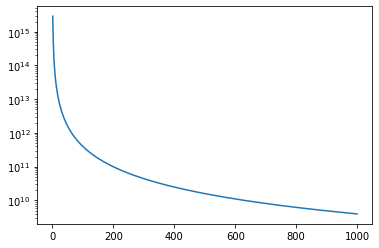

In [94]:
X_train3 = np.c_[np.ones(X_train.shape[0]),X_train ]
cls = SVM(X_train.shape[1],1e-3,1e-4)
error,_ = cls.fit(X_train3,Y_train)
plt.plot(error)
plt.yscale('log')

In [95]:
df = load_dataset("fashion-mnist_test_small_binary.csv")
Y3 = df['label']
X3 = df.drop('label',axis='columns')
X3 = np.c_[np.ones(X3.shape[0]),X3]
pred= cls.predict(X3)
np.sum( pred == Y3)/ len(X3)

0.91

## Showing conexity of our function ad gradient descent

In [129]:
rang = np.linspace(-100,100,500)
reg = 0.1
X,Y = np.meshgrid(rang,rang)
Z = np.zeros_like(X)
X_train3 = np.c_[np.ones(X_train.shape[0]),np.mean(X_train,axis=1) ]
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = 1/2 *(X[i][j]**2 + Y[i][j]**2)  + reg * np.sum( np.max( [np.zeros_like(Y_train),1 - Y_train * (X_train3@[X[i][j],Y[i][j]])] ) )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

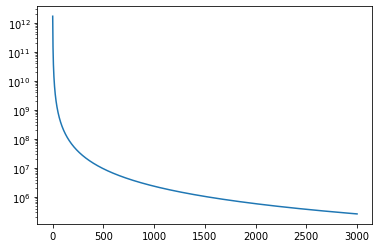

In [142]:
#Es fa servir la mitja de pixels per tenir nomes una variable i poder dibuixar el descens
X_train3 = np.c_[np.ones(X_train.shape[0]),np.mean(X_train,axis=1) ]
cls = SVM(np.asarray([-90,90]).T,1e-3,1e-4)
#Moltes iteracions perque convergeixi i sigui plotejable
error,_ = cls.fit(X_train3,Y_train,max_iter=3000)
plt.plot(error)
plt.yscale('log')

In [143]:
p = _
px,py = [x[0] for x in p],[x[1] for x in p]
z= np.zeros_like(px)
for i in range(len(px)):
    z[i] = 1/2 *(px[i]**2 + py[i]**2)  + reg * np.sum( np.max( [np.zeros_like(Y_train),1 - Y_train * (X_train3@[px[i],py[i]])] )) 

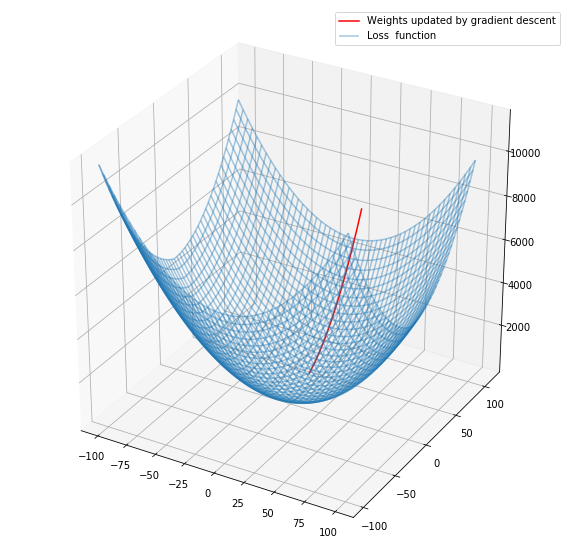

In [161]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection='3d')
Axes3D.plot_wireframe(ax,X,Y,Z,alpha=0.4,label='Loss  function')

ax.plot(px[800:],py[800:],z[800:],'r-',label='Weights updated by gradient descent')
ax.legend()